#Подключение библиотек

In [ ]:
# Работа с данными
import pandas as pd
import numpy as np

# Библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных



In [ ]:
# Начнем с чтения csv данных
df = pd.read_csv('sample_data/spotify-2023_fixed.csv')

In [ ]:
# Проверяем загрузку данных
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
# Информация по нашим данным
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

#Задаем параметры текста для наших графиков

In [ ]:
title_dict = {'fontsize': 20, 'fontweight': 'bold', 'color': '#808080', 'family': 'sans-serif'}
lable_dict = {'fontsize': '14', 'color': '#808080', 'family': 'sans-serif'}

#Создание графиков

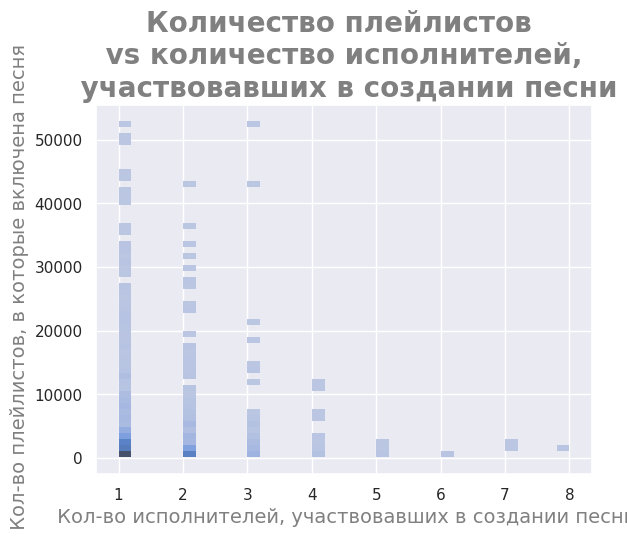

In [ ]:
sns.set_theme(style="darkgrid")
sns.histplot(data=df, x='artist_count', y='in_spotify_playlists')

plt.title("Количество плейлистов \n vs количество исполнителей, \n участвовавших в создании песни",
          fontdict=title_dict)
plt.xlabel(" Кол-во исполнителей, участвовавших в создании песни",
           fontdict=lable_dict)
plt.ylabel(" Кол-во плейлистов, в которые включена песня",
           fontdict=lable_dict)

plt.show()

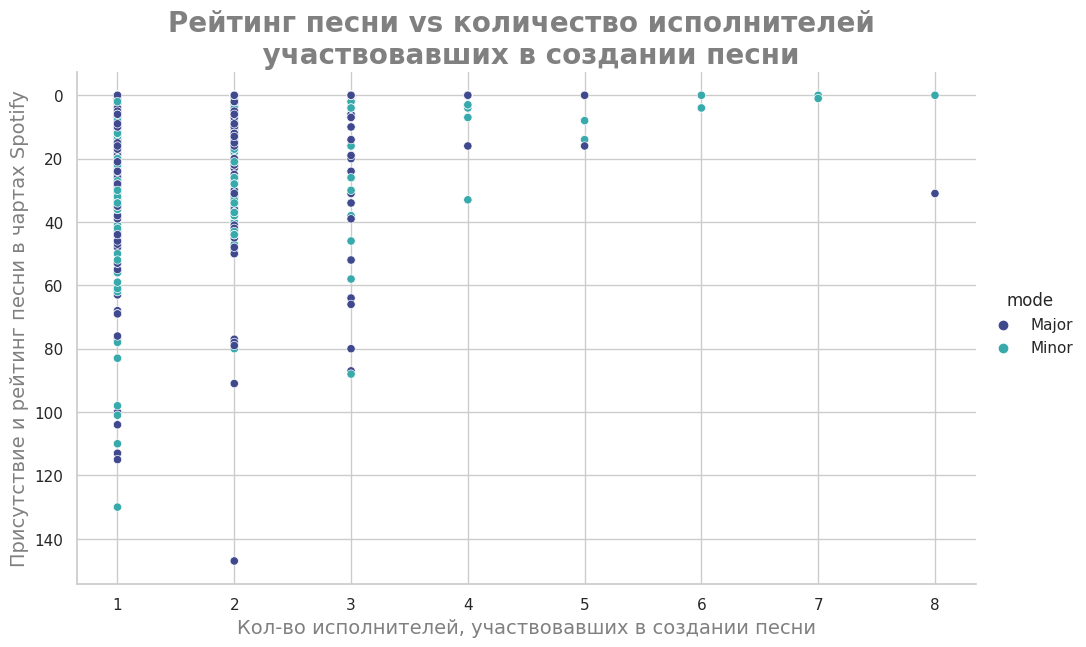

In [ ]:
sns.set_theme(style="whitegrid")


sns.relplot(data=df, x='artist_count', y='in_spotify_charts',
            hue='mode', height=6, aspect=1.67, palette='mako' )

plt.title("Рейтинг песни vs количество исполнителей \n участвовавших в создании песни",
          fontdict=title_dict)
plt.xlabel("Кол-во исполнителей, участвовавших в создании песни",
           fontdict=lable_dict)
plt.ylabel("Присутствие и рейтинг песни в чартах Spotify", fontdict=lable_dict)
plt.ylim(reversed(plt.ylim()))
plt.show()

Как мы видим из первого графика, количество плейлистов, в которые включена песня, резко снижается если количество исполнителей, учавствовавших в создании песни превышает три человека. Но из второго графика мы можем наблюдать что практически все песни, в которых принимало участие свыше трех человек никогда не опускались ниже 20 места в рейтинге Spotify.

#Находим уникальные значения.

In [ ]:
for col in df:
  print(col, len(df[col].unique()))


track_name 943
artist(s)_name 645
artist_count 8
released_year 50
released_month 12
released_day 31
in_spotify_playlists 879
in_spotify_charts 82
streams 949
in_apple_playlists 234
in_apple_charts 172
in_deezer_playlists 348
in_deezer_charts 34
in_shazam_charts 199
bpm 124
key 12
mode 2
danceability_% 72
valence_% 94
energy_% 80
acousticness_% 98
instrumentalness_% 39
liveness_% 68
speechiness_% 48


Исходя из полученой информации, мы видим что двумя признаками с наибольшим количеством уникальных цифровых значений, являются:
* in_spotify_playlists - 879
* in_deezer_playlists 348

Хотя на первый взгляд может показаться, что наибольшее числовое значение принадлежит признаку(колонке) "streams - 949", но данный признак имеет тип "Object", что в данном случае нам не подходит.

In [ ]:
df.loc[df['in_spotify_playlists'] <= 1000, 'playlists_group'] = 'менее 1к'
df.loc[(df['in_spotify_playlists'] > 1000) &
 (df['in_spotify_playlists'] <= 10000),
       'playlists_group'] = 'от 1к до 10к'
df.loc[df['in_spotify_playlists'] >  10000, 'playlists_group'] = 'от 10к'

#построение

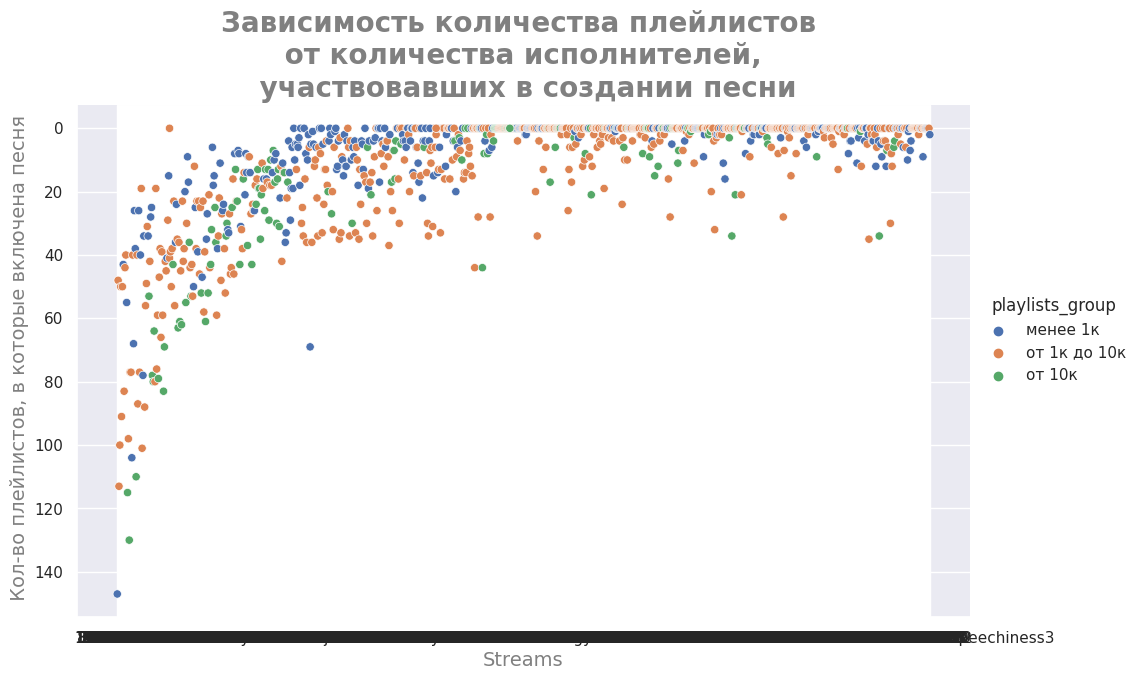

In [ ]:
sns.set_theme(style="darkgrid")
sns.relplot(data=df, x='streams', y='in_spotify_charts',
            hue='playlists_group', height=6, aspect=1.67)

plt.title("Зависимость рейтинга песни \n vs количества потоков",
          fontdict=title_dict)
plt.xlabel("Streams",
           fontdict=lable_dict)
plt.ylabel(" Кол-во плейлистов, в которые включена песня",
           fontdict=lable_dict)
plt.ylim(reversed(plt.ylim()))

plt.show()

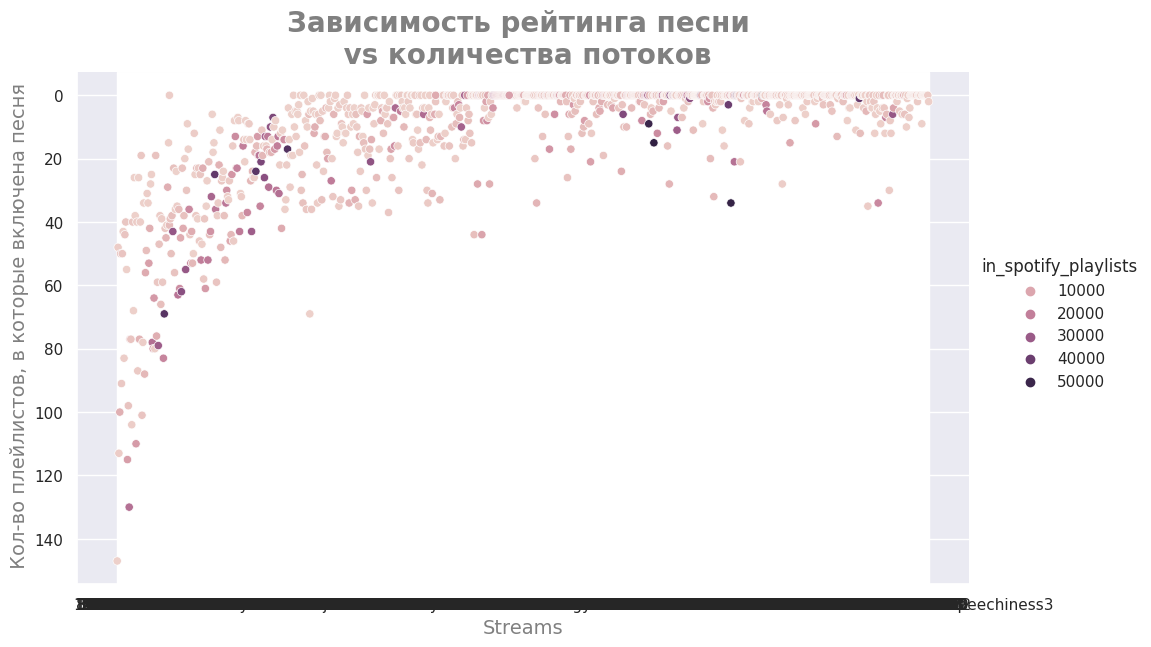

In [ ]:
sns.set_theme(style="darkgrid")
sns.relplot(data=df, x='streams', y='in_spotify_charts',
            hue='in_spotify_playlists', height=6, aspect=1.67)

plt.title("Зависимость рейтинга песни \n vs количества потоков",
          fontdict=title_dict)
plt.xlabel("Streams",
           fontdict=lable_dict)
plt.ylabel(" Кол-во плейлистов, в которые включена песня",
           fontdict=lable_dict)
plt.ylim(reversed(plt.ylim()))
plt.show()

На данном графике мы можем наблюдать некоторую кривую, на которой мы видим зависимость того что, чем выше место в рейтинге, тем больше у нее потоков. Так же мы можем видеть что большая часть песен, до 5 места в рейтинге, находятся на видимой кривой до момента когда количество потоков достигает определенного количества. В итоге мы можем ясно увидеть зависимость добавления в плейлисты и количества потоков от места в рейтинге(или популярности песни)

In [ ]:
df.loc[df['released_year'] <= 2000, 'years_group'] = 'до 2000г.'
df.loc[(df['released_year'] > 2000) &
 (df['released_year'] <= 2020),
       'years_group'] = 'от 2000 до 2020гг.'
df.loc[df['released_year'] >  2020, 'years_group'] = 'от 2020г.'

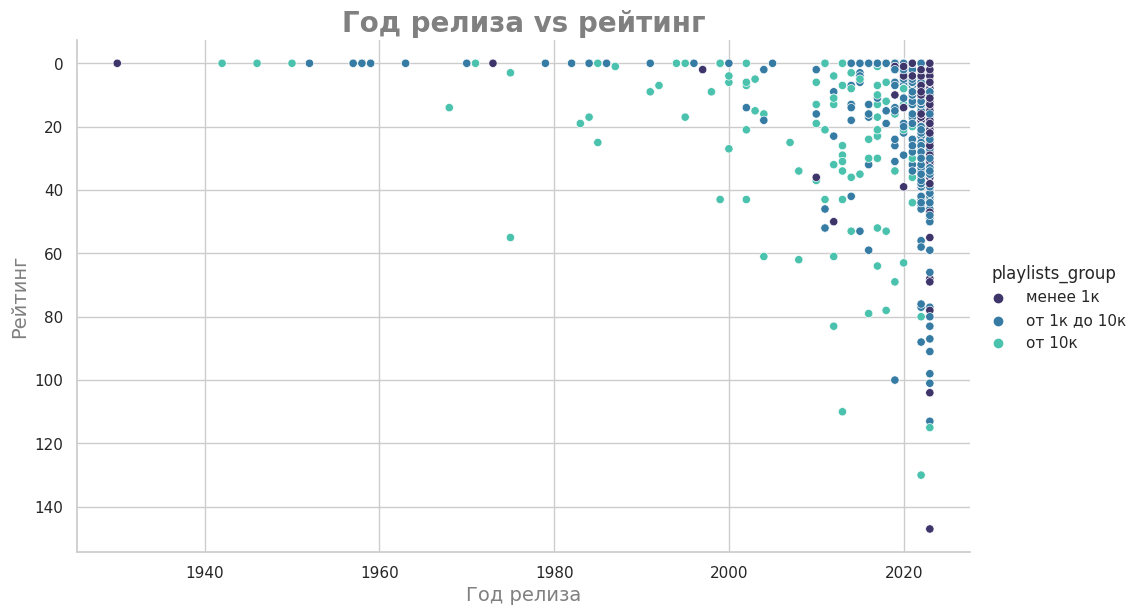

In [ ]:
sns.set_theme(style="whitegrid")


sns.relplot(data=df, x='released_year', y='in_spotify_charts',
            hue='playlists_group', height=6, aspect=1.67, palette='mako' )

plt.title("Год релиза vs рейтинг",
          fontdict=title_dict)
plt.xlabel("Год релиза",
           fontdict=lable_dict)
plt.ylabel("Рейтинг", fontdict=lable_dict)
plt.ylim(reversed(plt.ylim()))
plt.show()

Как мы видим все песни в рейтинге, выпущеные до 2000, находятся на вершинах рейтинга. Всё происходящее можно описать как "Классика, проверенная временем". Высокие рейтинги и большое количество плейлистов, в которые включены эти песни. Что касается периода с 2000 по 2020 годы, то и тут можно заметить что подавляющее большинство песен находятся в топ-50 и так же как и песни до 2000, включены в огромное количество плейлистов.

В отличии от предыдущего, период после 2020 года имеет более хаотичный разброс в рейтинге и более меньшее количество включений в плейлисты, чем периоды до 2020 года